1. What is Boosting in Machine Learning?
* Boosting is an ensemble learning technique that combines multiple weak learners to create a strong predictive model by sequentially focusing on the errors of previous models.

2. How does Boosting differ from Bagging?
* Boosting sequentially trains models, each focusing on the errors of the previous ones, while Bagging trains models independently on random subsets of the data to reduce variance. As a result, Boosting typically improves accuracy by reducing bias, whereas Bagging primarily aims to enhance stability and reduce overfitting.

3. What is the key idea behind AdaBoost?
* The key idea behind AdaBoost (Adaptive Boosting) is to combine multiple weak classifiers by assigning higher weights to misclassified instances in each iteration, thereby focusing subsequent classifiers on the hardest-to-predict examples to improve overall model accuracy.

4. Explain the working of AdaBoost with an example.
* AdaBoost works by initially assigning equal weights to all training instances, then iteratively training weak classifiers, adjusting the weights based on the misclassifications of the previous classifiers. For example, if a weak classifier misclassifies certain points, those points receive higher weights in the next iteration, prompting the next classifier to focus more on correcting those errors.

5. What is Gradient Boosting, and how is it different from AdaBoost?
* Gradient Boosting is an ensemble learning technique that builds models sequentially, optimizing a loss function by adding weak learners, typically decision trees. Unlike AdaBoost, which adjusts weights of misclassified instances, Gradient Boosting minimizes the loss function directly, making it more flexible in handling various types of data.

6. What is the loss function in Gradient Boosting?
* In Gradient Boosting, the loss function quantifies the difference between the predicted values and the actual target values, guiding the optimization process to improve model performance.

7. How does XGBoost improve over traditional Gradient Boosting?
* XGBoost improves over traditional Gradient Boosting by incorporating regularization to prevent overfitting, enabling parallel processing for faster computation, and offering better handling of missing data. Additionally, it employs a more sophisticated tree pruning method, enhancing overall model performance and flexibility.

8. What is the difference between XGBoost and CatBoost?
* XGBoost and CatBoost are both gradient boosting algorithms, but they differ primarily in their handling of categorical data and implementation details. CatBoost excels at processing categorical features without extensive preprocessing, while XGBoost requires more preprocessing steps for such data. Additionally, CatBoost often provides better accuracy with less tuning effort, but may have longer training times compared to XGBoost.

9.  What are some real-world applications of Boosting techniques?
* Boosting techniques are widely used in finance for fraud detection and credit scoring, as well as in healthcare for medical diagnosis and patient risk assessment. They are also applied in retail for customer segmentation and product recommendations, and in natural language processing for sentiment analysis.

10. How does regularization help in XGBoost?
* Regularization in XGBoost helps prevent overfitting by adding a penalty term to the loss function, which discourages overly complex models. Specifically, L1 (Lasso) regularization encourages sparsity in the model by driving some feature weights to zero, while L2 (Ridge) regularization penalizes large weights, promoting smoother models and improving generalization to unseen data.

11. What are some hyperparameters to tune in Gradient Boosting models?
* Key hyperparameters to tune in Gradient Boosting models include learning rate, number of estimators, maximum depth, and minimum samples for splits and leaves, which control model complexity and performance. Additionally, subsample, colsample_bytree, and regularization parameters (L1 and L2) help prevent overfitting and improve generalization.

12. What is the concept of Feature Importance in Boosting?
* Feature importance in boosting refers to the technique used to evaluate the contribution of each feature in making predictions within a model. In boosting algorithms, such as XGBoost and CatBoost, feature importance can be derived from metrics like the number of times a feature is used to split the data across all trees, the average gain or improvement in prediction accuracy attributed to each feature, or the total reduction in loss achieved by using a feature, helping to identify which features are most influential in the model's decision-making process.

13. Why is CatBoost efficient for categorical data?
* CatBoost is efficient for handling categorical data due to its unique approach that includes automatic encoding of categorical features and the use of target-based encoding. This allows it to process categorical variables without extensive preprocessing, reducing the risk of overfitting and improving model accuracy.


In [ ]:
#Question 14

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                    72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                    88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

X, y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7142857142857143


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [ ]:
#Question 15
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

X = np.random.rand(1000, 10)
y = X @ np.random.rand(10) + np.random.normal(0, 0.1, 1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.22


Feature Importance:
                    Feature  Importance
7       mean concave points    0.450528
27     worst concave points    0.240103
20             worst radius    0.075589
22          worst perimeter    0.051408
21            worst texture    0.039886
23               worst area    0.038245
1              mean texture    0.027805
26          worst concavity    0.018725
16          concavity error    0.013068
13               area error    0.008415
10             radius error    0.006870
24         worst smoothness    0.004811
19  fractal dimension error    0.004224
11            texture error    0.003604
5          mean compactness    0.002996
15        compactness error    0.002511
4           mean smoothness    0.002467
17     concave points error    0.002038
28           worst symmetry    0.001478
12          perimeter error    0.001157
6            mean concavity    0.000922
18           symmetry error    0.000703
14         smoothness error    0.000556
8             mean s

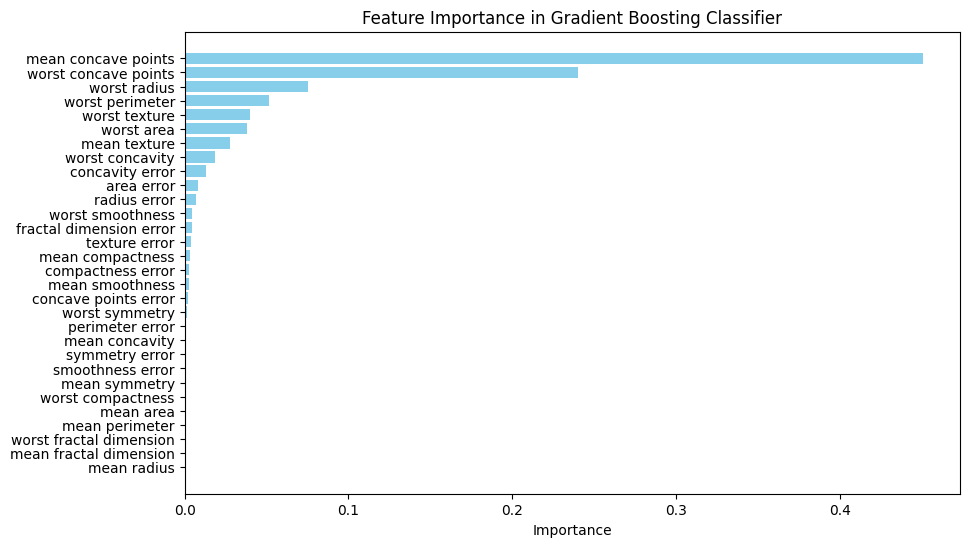

In [ ]:
#Question 16
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Question 17

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.9247


In [ ]:
#Question 18
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"XGBoost Accuracy:          {xgb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.9561
XGBoost Accuracy:          0.9561


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:34:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#Question 19


from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)

f1 = f1_score(y_test, y_pred)

print(f"CatBoost F1 Score: {f1:.4f}")


CatBoost F1 Score: 0.9790


In [ ]:
#Question 20
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"XGBoost Regressor MSE: {mse:.4f}")


XGBoost Regressor MSE: 1687.9655


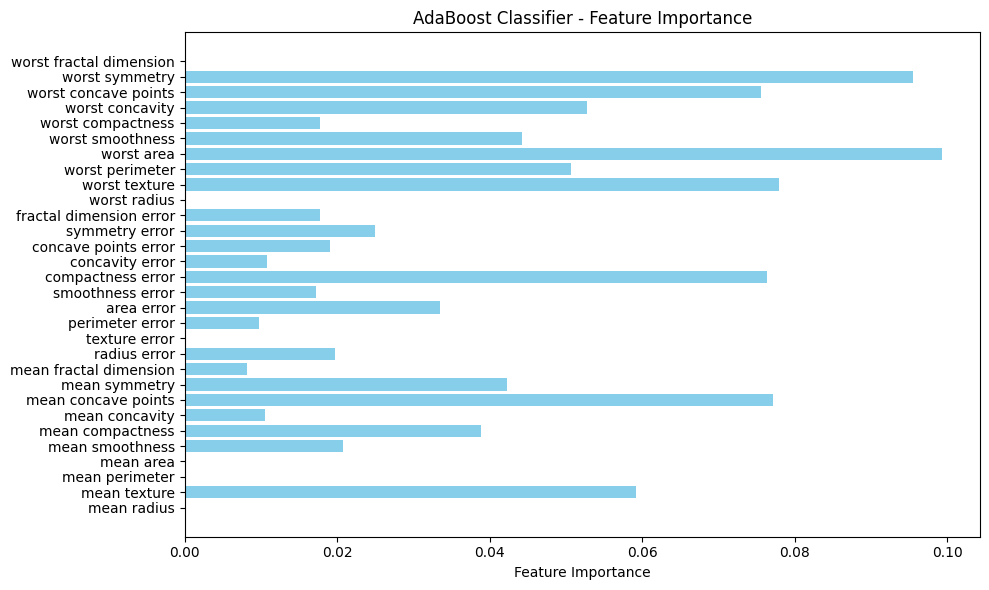

In [ ]:
#Question 21
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("AdaBoost Classifier - Feature Importance")
plt.tight_layout()
plt.show()


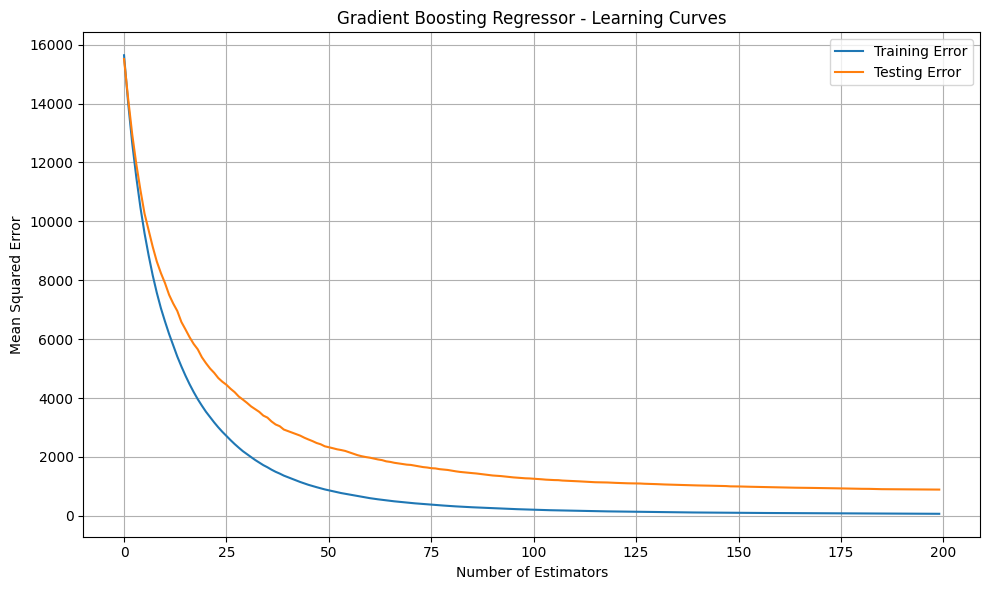

In [ ]:
#Question 22
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

train_errors = []
test_errors = []

for y_pred_train, y_pred_test in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test, y_pred_test))

plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Training Error")
plt.plot(test_errors, label="Testing Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Regressor - Learning Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:40:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

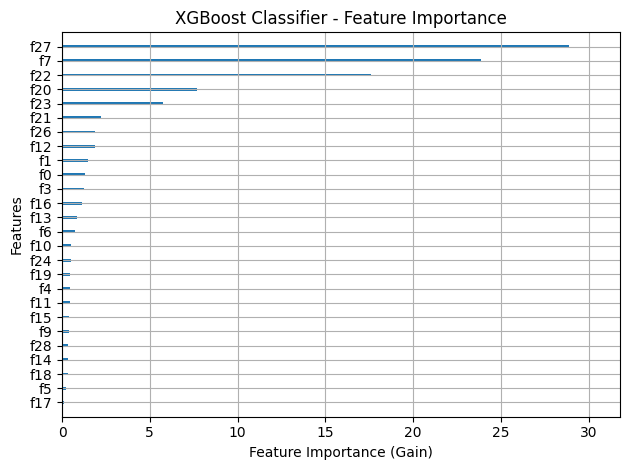

In [ ]:
#Question 23

import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='gain', xlabel='Feature Importance (Gain)', show_values=False)
plt.title("XGBoost Classifier - Feature Importance")
plt.tight_layout()
plt.show()


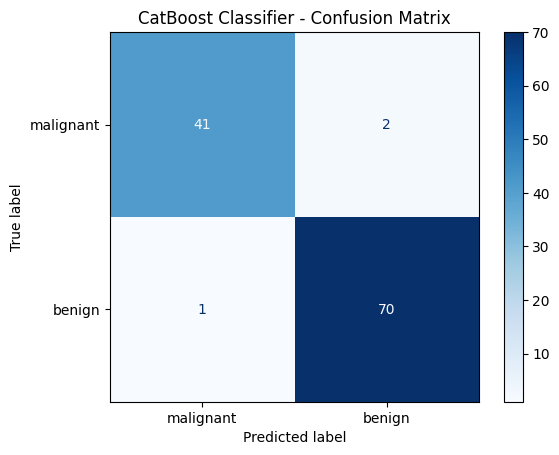

In [ ]:
#Question 24
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

disp.plot(cmap='Blues')
plt.title("CatBoost Classifier - Confusion Matrix")
plt.grid(False)
plt.show()


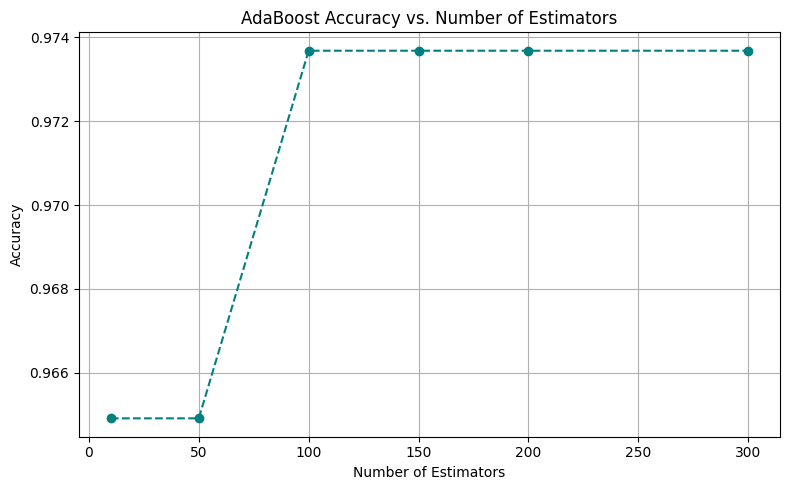

In [ ]:
#Question 25

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator_range = [10, 50, 100, 150, 200, 300]
accuracy_scores = []

for n in estimator_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 5))
plt.plot(estimator_range, accuracy_scores, marker='o', linestyle='--', color='teal')
plt.title("AdaBoost Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


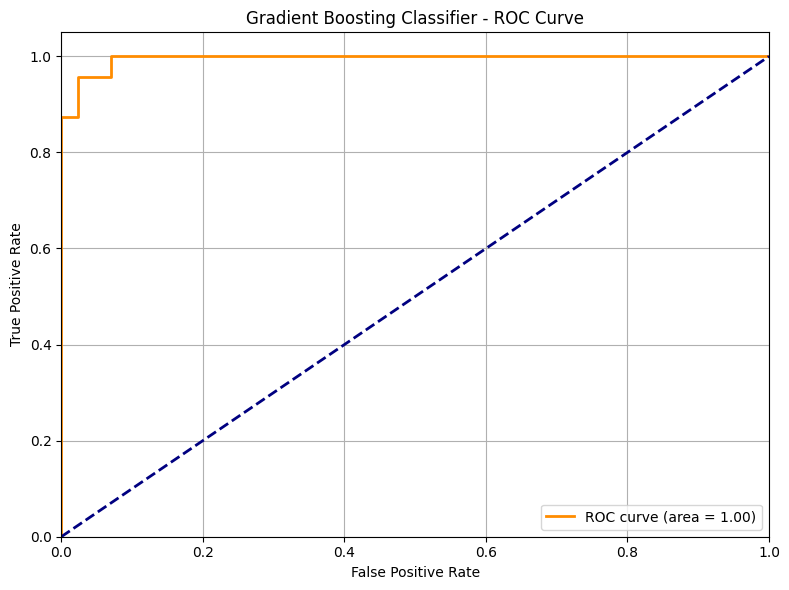

In [ ]:
#Question 26

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier - ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Question 27
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

california = fetch_california_housing()
X, y = california.data, california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg = XGBRegressor(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Test set MSE: {mse:.4f}")




Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best score (MSE): 0.21088626817748185
Test set MSE: 0.2085


In [ ]:
#Question 28

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_no_weight = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
model_no_weight.fit(X_train, y_train)

y_pred_no_weight = model_no_weight.predict(X_test)

model_with_weight = CatBoostClassifier(iterations=100, random_state=42, class_weights=[1, 10], verbose=0)
model_with_weight.fit(X_train, y_train)

y_pred_with_weight = model_with_weight.predict(X_test)

def evaluate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

metrics_no_weight = evaluate_performance(y_test, y_pred_no_weight)
metrics_with_weight = evaluate_performance(y_test, y_pred_with_weight)

print("Without Class Weighting:")
print(f"Accuracy: {metrics_no_weight[0]:.4f}")
print(f"Precision: {metrics_no_weight[1]:.4f}")
print(f"Recall: {metrics_no_weight[2]:.4f}")
print(f"F1-Score: {metrics_no_weight[3]:.4f}\n")

print("With Class Weighting:")
print(f"Accuracy: {metrics_with_weight[0]:.4f}")
print(f"Precision: {metrics_with_weight[1]:.4f}")
print(f"Recall: {metrics_with_weight[2]:.4f}")
print(f"F1-Score: {metrics_with_weight[3]:.4f}")


Without Class Weighting:
Accuracy: 0.9533
Precision: 0.9444
Recall: 0.5667
F1-Score: 0.7083

With Class Weighting:
Accuracy: 0.9000
Precision: 0.5000
Recall: 0.7000
F1-Score: 0.5833


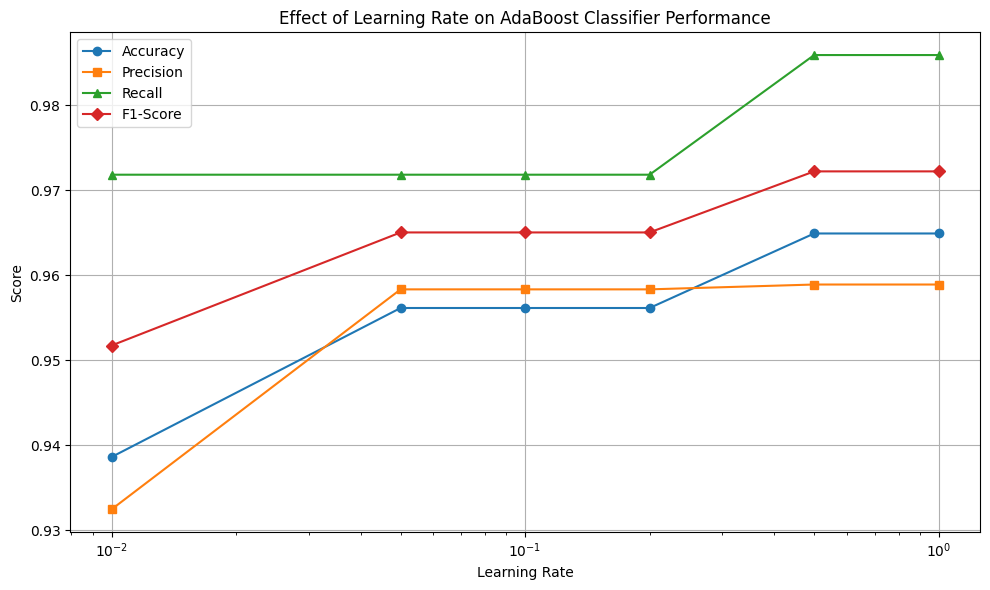

In [ ]:
#Question 29

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracy_scores, label="Accuracy", marker='o')
plt.plot(learning_rates, precision_scores, label="Precision", marker='s')
plt.plot(learning_rates, recall_scores, label="Recall", marker='^')
plt.plot(learning_rates, f1_scores, label="F1-Score", marker='D')

plt.title("Effect of Learning Rate on AdaBoost Classifier Performance")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Question 30
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_prob)

print(f"Log-Loss: {logloss:.4f}")


Log-Loss: 0.0100
